In [1]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import io
import lxml.html as lh
import bs4 as bs
from bs4 import BeautifulSoup

import urllib.request

!pip install wikipedia
import wikipedia as wp

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
#import geocoder # import geocoder

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
! pip install folium==0.5.0
import folium # plotting library

! pip install yellowbrick

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
# scrape wikipedia toronto postal codes
List_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(List_url).text

soup = BeautifulSoup(source, 'lxml')
table=soup.find('table')

#dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
column_names = ['Postalcode','Borough','Neighborhood']
df = pd.DataFrame(columns = column_names)
df

,Postalcode,Borough,Neighborhood


In [3]:
#DATA notes:
#Toronto postal codes, boroughs, neighbor hoods scraped from wikipedia:
#https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

#From wikipedia: "This is a list of postal codes in Canada where the first letter is M. 
#Postal codes beginning with M are located within the city of Toronto in the province of Ontario. 
#Only the first three characters are listed, corresponding to the Forward Sortation Area."

#There may be multiple postal codes per borough. 
#There may be multiple neighborhoods per borough.
#There may be multiple neighborhoods per postal code.


In [4]:
#clean the dataframe data
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['Postal Code'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)


df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
#print(table_contents)
df

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [5]:
#add latitude and longitude by postal code
import pathlib
from pathlib import Path
from pathlib import *
import csv


df_data_3 = pd.read_csv('C:\Geospatial_Coordinates (1).csv')
df_data_3.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [6]:
# load csv file curated from foursquare, cybo.com, wikipedia.com, yellowpages.ca and www150.statcan.gc.ca 
# columns: postal codes, neighborhood, latitude, longitude, population, popdensity, aveincome, pizza, fastood
# rows deleted: m5k,m5l,m5w,m5x,m7a,m7r,m7y
# create dataframe
toronto_postal_data = pd.read_csv('c:/toronto_pop_inc_postalcode_pizza_ff2.csv')
df_toronto = pd.DataFrame(toronto_postal_data)
df_toronto

,Postal Code,Neighborhood,Latitude,Longitude,Population,PopDensity,AveIncome,Pizza,Fast Food
0,M1B,"Malvern, Rouge",43.806686,-79.194353,66108,1955,60031.666667,11,15
1,M1C,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,35626,2673,73646.666667,4,4
2,M1E,"Guildwood, Morningside, West Hill",43.763573,-79.188711,46943,3031,52642.666667,16,9
3,M1G,Woburn,43.770992,-79.216917,29690,3831,47908.000000,7,1
4,M1H,Cedarbrae,43.773136,-79.239476,24383,4578,47022.000000,11,10
...,...,...,...,...,...,...,...,...,...
91,M9N,Weston,43.706876,-79.518188,25074,4936,82016.000000,18,9
92,M9P,Westmount,43.696319,-79.532242,20874,3575,52816.500000,5,3
93,M9R,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724,33743,4969,57048.000000,4,4
94,M9V,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,55959,3760,52254.000000,22,7


In [7]:
print('The dataframe has {} neighborhoods and {} Postal Codes.'.format(
        len(df_toronto['Neighborhood'].unique()),
        df_toronto.shape[0]
    )
)
df_toronto.head(96)

The dataframe has 96 neighborhoods and 96 Postal Codes.


,Postal Code,Neighborhood,Latitude,Longitude,Population,PopDensity,AveIncome,Pizza,Fast Food
0,M1B,"Malvern, Rouge",43.806686,-79.194353,66108,1955,60031.666667,11,15
1,M1C,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,35626,2673,73646.666667,4,4
2,M1E,"Guildwood, Morningside, West Hill",43.763573,-79.188711,46943,3031,52642.666667,16,9
3,M1G,Woburn,43.770992,-79.216917,29690,3831,47908.000000,7,1
4,M1H,Cedarbrae,43.773136,-79.239476,24383,4578,47022.000000,11,10
...,...,...,...,...,...,...,...,...,...
91,M9N,Weston,43.706876,-79.518188,25074,4936,82016.000000,18,9
92,M9P,Westmount,43.696319,-79.532242,20874,3575,52816.500000,5,3
93,M9R,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724,33743,4969,57048.000000,4,4
94,M9V,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,55959,3760,52254.000000,22,7


In [8]:
address = 'Toronto'
geolocator = Nominatim(user_agent="toronto_explorer")
locate = geolocator.geocode(address)
latitude = locate.latitude
longitude = locate.longitude
print('Toronto Coordinates: {}, {}.'.format(latitude, longitude))

Toronto Coordinates: 43.6534817, -79.3839347.


In [9]:
# create map of Toronto using latitude and longitude values -- popups show postal code, neighborhood and population
map_toronto_hoods = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, postalcode, neighborhood, population in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Postal Code'], df_toronto['Neighborhood'],df_toronto['Population']):
    label = '{}, {}, {}'.format(postalcode,neighborhood,population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_hoods)  
    
map_toronto_hoods

In [10]:
CLIENT_ID = '2K1YDT1I5RY4NGNMVIBTRVKXIDCF0V2GWYPQR2UELKIN3AXH' # your Foursquare ID
CLIENT_SECRET = 'U2DZSOQSKVFVPUI4ZHR0J4WKKSULNA0PREYCTBCHSOMOTGRK' # your Foursquare Secret
ACCESS_TOKEN = 'CRL15FXAGJATNJ0V3ORUZR0RTBCPFRATXCFCHETATV40Z0M3' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 300
radius = 500
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

#fs_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
fs_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
#display url from foursquare
fs_url

Your credentials:
CLIENT_ID: 2K1YDT1I5RY4NGNMVIBTRVKXIDCF0V2GWYPQR2UELKIN3AXH
CLIENT_SECRET:U2DZSOQSKVFVPUI4ZHR0J4WKKSULNA0PREYCTBCHSOMOTGRK


'https://api.foursquare.com/v2/venues/explore?&client_id=2K1YDT1I5RY4NGNMVIBTRVKXIDCF0V2GWYPQR2UELKIN3AXH&client_secret=U2DZSOQSKVFVPUI4ZHR0J4WKKSULNA0PREYCTBCHSOMOTGRK&v=20180604&ll=43.6534817,-79.3839347&radius=500&limit=300'

In [11]:
#display all the data from foursquare (toronto)
fs_toronto = requests.get(fs_url).json()
#fs_toronto

In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venues.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
# function get_nearby_venues(downtown_df['neighbourhood'], downtown_df['latitude'], downtown_df['longitude'])
def getNearbyVenues(postalcodes, neighborhoods, latitudes, longitudes, radius=500):
    LIMIT = 500 # limit of number of venues returned by Foursquare API
    radius = 500 # define radius
    venues_list=[]
    for PostalCode, neighborhood, lat, lng in zip(postalcodes, neighborhoods, latitudes, longitudes):
        print(PostalCode,neighborhood)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            PostalCode,
            neighborhood, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postal Code','Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
#Get venues and postal codes for all neighborhoods in our dataset
toronto_venues = getNearbyVenues(postalcodes=df_toronto['Postal Code'],
                                neighborhoods=df_toronto['Neighborhood'], 
                                latitudes=df_toronto['Latitude'],
                                longitudes=df_toronto['Longitude'])

M1B Malvern, Rouge
M1C Rouge Hill, Port Union, Highland Creek
M1E Guildwood, Morningside, West Hill
M1G Woburn
M1H Cedarbrae
M1J Scarborough Village
M1K Kennedy Park, Ionview, East Birchmount Park
M1L Golden Mile, Clairlea, Oakridge
M1M Cliffside, Cliffcrest, Scarborough Village West
M1N Birch Cliff, Cliffside West
M1P Dorset Park, Wexford Heights, Scarborough Town Centre
M1R Wexford, Maryvale
M1S Agincourt
M1T Clarks Corners, Tam O'Shanter, Sullivan
M1V Milliken, Agincourt North, Steeles East, L'Amoreaux East
M1W Steeles West, L'Amoreaux West
M1X Armdale
M2H Hillcrest Village
M2J Fairview, Henry Farm, Oriole
M2K Bayview Village
M2L York Mills Silver Hills
M2M Willowdale, Newtonbrook
M2N Willowdale South
M2P York Mills West
M2R Willowdale West
M3A Parkwoods
M3B Don Mills North
M3C Don Mills South
M3H Bathurst Manor, Wilson Heights, Downsview North
M3J Northwood Park, York University
M3K Downsview East
M3L Downsview West
M3M Downsview Central
M3N Downsview Northwest
M4A Victoria Village

In [15]:
toronto_venues


,Postal Code,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M1B,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,M1C,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,M1C,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,SEBS Engineering Inc. (Sustainable Energy and ...,43.782371,-79.156820,Construction & Landscaping
3,M1E,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,M1E,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
...,...,...,...,...,...,...,...,...
1569,M9V,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,Albion Cinemas,43.741940,-79.584988,Indie Movie Theater
1570,M9W,"Clairville, Humberwood, Woodbine Downs, West H...",43.706748,-79.594054,Economy Rent A Car,43.708471,-79.589943,Rental Car Location
1571,M9W,"Clairville, Humberwood, Woodbine Downs, West H...",43.706748,-79.594054,Saand Rexdale,43.705072,-79.598725,Drugstore
1572,M9W,"Clairville, Humberwood, Woodbine Downs, West H...",43.706748,-79.594054,PC Garden,43.706539,-79.599359,Garden Center


In [16]:
toronto_venues.groupby('Postal Code').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postal Code,,,,,,,
M1B,1,1,1,1,1,1,1
M1C,2,2,2,2,2,2,2
M1E,10,10,10,10,10,10,10
M1G,3,3,3,3,3,3,3
M1H,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
M9N,2,2,2,2,2,2,2
M9P,8,8,8,8,8,8,8
M9R,4,4,4,4,4,4,4


In [17]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add postal code column to dataframe
toronto_onehot['Postal Code'] = toronto_venues['Postal Code'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head(100)

,Postal Code,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M1B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M1C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M1C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M1E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M1E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M2H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,M2H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,M2H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,M2H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
toronto_onehot.shape

(1574, 250)

In [19]:
#Next, let's group rows by postal code taking the 
#mean of the frequency of occurrence of each category

toronto_grouped = toronto_onehot.groupby('Postal Code').mean().reset_index()
toronto_grouped

,Postal Code,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M1B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M1C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M1E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M1G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M1H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,M9N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,M9P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,M9R,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,M9V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
toronto_pizza = toronto_grouped[["Postal Code","Pizza Place"]]
toronto_pizza.head(100)  

,Postal Code,Pizza Place
0,M1B,0.000000
1,M1C,0.000000
2,M1E,0.000000
3,M1G,0.000000
4,M1H,0.000000
...,...,...
91,M9N,0.000000
92,M9P,0.250000
93,M9R,0.250000
94,M9V,0.111111


In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = toronto_pizza.drop(['Postal Code'], axis=1)

In [22]:
kmeans.fit(X)
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [24]:
scores = [get_inertia(x) for x in range(2, 10)]

Text(0, 0.5, 'Error')

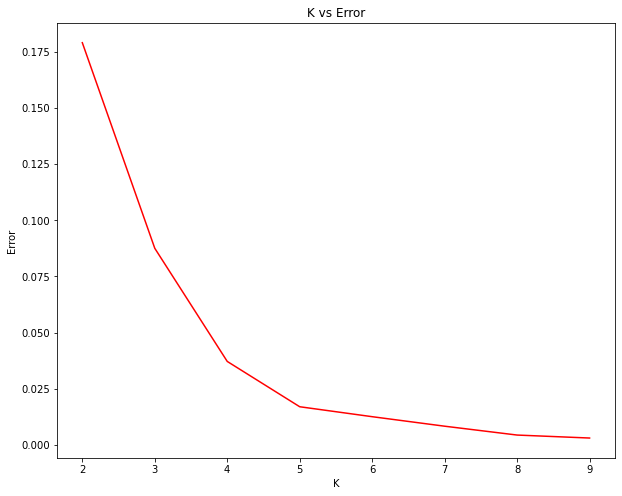

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 10), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 10))
plt.xlabel("K")
plt.ylabel("Error")

In [26]:
from yellowbrick.cluster import KElbowVisualizer

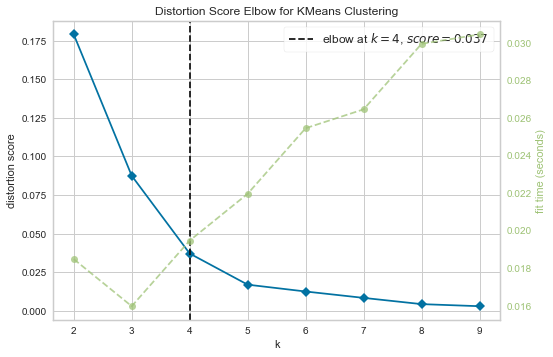

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [49]:
kclusters = 4

toronto_grouped_clustering = toronto_pizza.drop('Postal Code', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
toronto_grouped_clustering

,Pizza Place,Cluster Labels
0,0.000000,0
1,0.000000,0
2,0.000000,0
3,0.000000,0
4,0.000000,0
...,...,...
91,0.000000,0
92,0.250000,1
93,0.250000,1
94,0.111111,2


In [51]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
toronto_merged = toronto_pizza.copy()

# add clustering labels
toronto_merged["Cluster Labels"] = kmeans.labels_

In [52]:
toronto_merged

,Postal Code,Pizza Place,Cluster Labels
0,M1B,0.000000,0
1,M1C,0.000000,0
2,M1E,0.000000,0
3,M1G,0.000000,0
4,M1H,0.000000,0
...,...,...,...
91,M9N,0.000000,0
92,M9P,0.250000,3
93,M9R,0.250000,3
94,M9V,0.111111,1


In [53]:
toronto_merged = toronto_merged.join(df_data_3.set_index("Postal Code"), on="Postal Code")

#print(toronto_merged.shape)
toronto_merged.head()

,Postal Code,Pizza Place,Cluster Labels,Latitude,Longitude
0,M1B,0.0,0,43.806686,-79.194353
1,M1C,0.0,0,43.784535,-79.160497
2,M1E,0.0,0,43.763573,-79.188711
3,M1G,0.0,0,43.770992,-79.216917
4,M1H,0.0,0,43.773136,-79.239476


In [54]:
# sort the results by Cluster Labels
print(toronto_merged.shape)
toronto_merged.sort_values(["Cluster Labels"], inplace=True)
toronto_merged

(96, 5)


,Postal Code,Pizza Place,Cluster Labels,Latitude,Longitude
0,M1B,0.000000,0,43.806686,-79.194353
62,M5P,0.000000,0,43.696948,-79.411307
61,M5N,0.000000,0,43.711695,-79.416936
59,M5J,0.030000,0,43.640816,-79.381752
58,M5H,0.020000,0,43.650571,-79.384568
...,...,...,...,...,...
82,M8W,0.285714,3,43.602414,-79.543484
34,M4A,0.250000,3,43.725882,-79.315572
92,M9P,0.250000,3,43.696319,-79.532242
93,M9R,0.250000,3,43.688905,-79.554724


In [55]:
#toronto_merged['Fast Food Restaurant'].value_counts()['Fast Food Restaurant']

In [56]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Postal Code'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

In [57]:
toronto_pizza["Cluster Labels"] = kmeans.labels_
toronto_pizza.head(100)

<ipython-input-57-98aabc99f927>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toronto_pizza["Cluster Labels"] = kmeans.labels_


,Postal Code,Pizza Place,Cluster Labels
0,M1B,0.000000,0
1,M1C,0.000000,0
2,M1E,0.000000,0
3,M1G,0.000000,0
4,M1H,0.000000,0
...,...,...,...
91,M9N,0.000000,0
92,M9P,0.250000,3
93,M9R,0.250000,3
94,M9V,0.111111,1


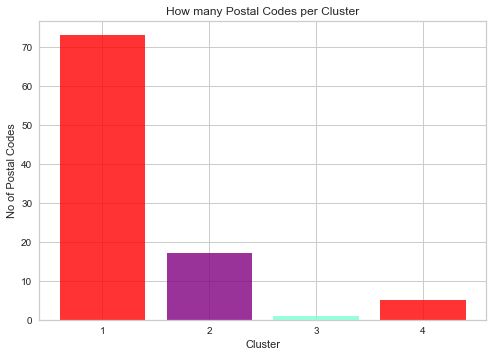

In [58]:
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
performance = toronto_pizza['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Postal Codes')
plt.xlabel('Cluster')
plt.title('How many Postal Codes per Cluster')

plt.show()

In [59]:
# How many neighborhoods in each cluster
toronto_pizza['Cluster Labels'].value_counts()

0    73
1    17
3     5
2     1
Name: Cluster Labels, dtype: int64

In [60]:
# Red 
cluster0 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]
df_cluster0 = pd.merge(df_data_3, cluster0, on='Postal Code')
df_cluster0

,Postal Code,Latitude_x,Longitude_x,Pizza Place,Cluster Labels,Latitude_y,Longitude_y
0,M1B,43.806686,-79.194353,0.0,0,43.806686,-79.194353
1,M1C,43.784535,-79.160497,0.0,0,43.784535,-79.160497
2,M1E,43.763573,-79.188711,0.0,0,43.763573,-79.188711
3,M1G,43.770992,-79.216917,0.0,0,43.770992,-79.216917
4,M1H,43.773136,-79.239476,0.0,0,43.773136,-79.239476
...,...,...,...,...,...,...,...
68,M9A,43.667856,-79.532242,0.0,0,43.667856,-79.532242
69,M9B,43.650943,-79.554724,0.0,0,43.650943,-79.554724
70,M9M,43.724766,-79.532242,0.0,0,43.724766,-79.532242
71,M9N,43.706876,-79.518188,0.0,0,43.706876,-79.518188


In [61]:
# purple
cluster1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]
df_cluster1 = pd.merge(df_data_3, cluster1, on='Postal Code')
df_cluster1

,Postal Code,Latitude_x,Longitude_x,Pizza Place,Cluster Labels,Latitude_y,Longitude_y
0,M1T,43.781638,-79.304302,0.142857,1,43.781638,-79.304302
1,M1W,43.799525,-79.318389,0.083333,1,43.799525,-79.318389
2,M2N,43.770120,-79.408493,0.066667,1,43.770120,-79.408493
3,M2R,43.782736,-79.442259,0.166667,1,43.782736,-79.442259
4,M3H,43.754328,-79.442259,0.066667,1,43.754328,-79.442259
5,M4B,43.706397,-79.309937,0.181818,1,43.706397,-79.309937
6,M4L,43.668999,-79.315572,0.071429,1,43.668999,-79.315572
7,M4S,43.704324,-79.388790,0.137931,1,43.704324,-79.388790
8,M4V,43.686412,-79.400049,0.090909,1,43.686412,-79.400049
9,M4X,43.667967,-79.367675,0.068182,1,43.667967,-79.367675


In [62]:
# navy
cluster2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]
df_cluster2 = pd.merge(df_data_3, cluster2, on='Postal Code')
df_cluster2

,Postal Code,Latitude_x,Longitude_x,Pizza Place,Cluster Labels,Latitude_y,Longitude_y
0,M9L,43.756303,-79.565963,0.5,2,43.756303,-79.565963


In [63]:
# green
cluster3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]
df_cluster3 = pd.merge(df_data_3, cluster3, on='Postal Code')
df_cluster3

,Postal Code,Latitude_x,Longitude_x,Pizza Place,Cluster Labels,Latitude_y,Longitude_y
0,M4A,43.725882,-79.315572,0.250000,3,43.725882,-79.315572
1,M6B,43.709577,-79.445073,0.333333,3,43.709577,-79.445073
2,M8W,43.602414,-79.543484,0.285714,3,43.602414,-79.543484
3,M9P,43.696319,-79.532242,0.250000,3,43.696319,-79.532242
4,M9R,43.688905,-79.554724,0.250000,3,43.688905,-79.554724


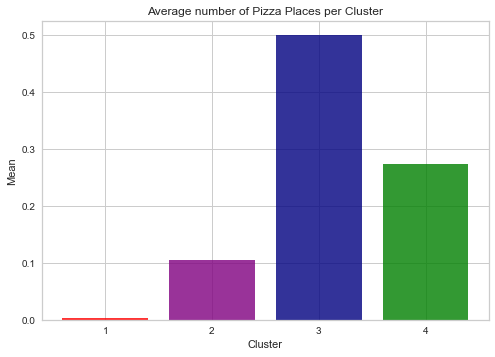

In [66]:
clusters_mean = [df_cluster0['Pizza Place'].mean(),df_cluster1['Pizza Place'].mean(),df_cluster2['Pizza Place'].mean(),df_cluster3['Pizza Place'].mean()]
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','navy', 'green'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Pizza Places per Cluster')

plt.show()

In [67]:
df_toronto

,Postal Code,Neighborhood,Latitude,Longitude,Population,PopDensity,AveIncome,Pizza,Fast Food
0,M1B,"Malvern, Rouge",43.806686,-79.194353,66108,1955,60031.666667,11,15
1,M1C,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,35626,2673,73646.666667,4,4
2,M1E,"Guildwood, Morningside, West Hill",43.763573,-79.188711,46943,3031,52642.666667,16,9
3,M1G,Woburn,43.770992,-79.216917,29690,3831,47908.000000,7,1
4,M1H,Cedarbrae,43.773136,-79.239476,24383,4578,47022.000000,11,10
...,...,...,...,...,...,...,...,...,...
91,M9N,Weston,43.706876,-79.518188,25074,4936,82016.000000,18,9
92,M9P,Westmount,43.696319,-79.532242,20874,3575,52816.500000,5,3
93,M9R,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724,33743,4969,57048.000000,4,4
94,M9V,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,55959,3760,52254.000000,22,7


In [68]:
toronto_postal_pop = pd.read_csv('c:/toronto_pop_inc_postalcode.csv')
df_toronto_pop = pd.DataFrame(toronto_postal_pop)
df_toronto_pop

,Postal Code,Population,PopDensity,Pizza,Fast Food
0,M1B,66108,1955,11,15
1,M1C,35626,2673,4,4
2,M1E,46943,3031,16,9
3,M1G,29690,3831,7,1
4,M1H,24383,4578,11,10
...,...,...,...,...,...
91,M9N,25074,4936,18,9
92,M9P,20874,3575,5,3
93,M9R,33743,4969,4,4
94,M9V,55959,3760,22,7


In [69]:
df_toronto_pop_2 = toronto_pizza.join(df_toronto_pop.set_index("Postal Code"), on="Postal Code")

#print(toronto_merged.shape)
df_toronto_pop_2.head(100)

,Postal Code,Pizza Place,Cluster Labels,Population,PopDensity,Pizza,Fast Food
0,M1B,0.000000,0,66108,1955,11,15
1,M1C,0.000000,0,35626,2673,4,4
2,M1E,0.000000,0,46943,3031,16,9
3,M1G,0.000000,0,29690,3831,7,1
4,M1H,0.000000,0,24383,4578,11,10
...,...,...,...,...,...,...,...
91,M9N,0.000000,0,25074,4936,18,9
92,M9P,0.250000,3,20874,3575,5,3
93,M9R,0.250000,3,33743,4969,4,4
94,M9V,0.111111,1,55959,3760,22,7


In [70]:
df_toronto_pop_2.sort_values(["Cluster Labels"], inplace=True)
df_toronto_pop_2

,Postal Code,Pizza Place,Cluster Labels,Population,PopDensity,Pizza,Fast Food
0,M1B,0.000000,0,66108,1955,11,15
62,M5P,0.000000,0,19423,6436,4,2
61,M5N,0.000000,0,16610,6716,1,0
59,M5J,0.030000,0,14545,2546,12,19
58,M5H,0.020000,0,2005,4660,14,9
...,...,...,...,...,...,...,...
82,M8W,0.285714,3,20674,2925,7,1
34,M4A,0.250000,3,14443,3539,0,0
92,M9P,0.250000,3,20874,3575,5,3
93,M9R,0.250000,3,33743,4969,4,4


In [71]:
df_toronto_pop_2.sort_values(["Population"], inplace=True)
df_toronto_pop_2.tail(10)

,Postal Code,Pizza Place,Cluster Labels,Population,PopDensity,Pizza,Fast Food
36,M4C,0.000000,0,46866,8918,14,5
2,M1E,0.000000,0,46943,3031,16,9
6,M1K,0.000000,0,48434,5591,12,6
15,M1W,0.083333,1,48471,6325,5,6
66,M5V,0.000000,0,49195,7913,39,25
14,M1V,0.000000,0,54680,4313,15,11
94,M9V,0.111111,1,55959,3760,22,7
18,M2J,0.016129,0,58293,5573,6,11
0,M1B,0.000000,0,66108,1955,11,15
22,M2N,0.066667,1,75897,7236,23,20


In [107]:
dfx = pd.DataFrame(df_toronto_pop_2)
dfx["PizzaPer1000"] = dfx.apply(lambda row: (row.Pizza/row.Population)*1000, axis = 1)
#dfx["FastFoodPer1000"] = dfx.apply(lambda row: (row.Fast Food/row.Population)*1000, axis = 2)
dfx


,Postal Code,Pizza Place,Cluster Labels,Population,PopDensity,Pizza,Fast Food,PizzaPer1000
58,M5H,0.020000,0,2005,4660,14,9,6.982544
55,M5C,0.000000,0,2951,11010,6,6,2.033209
30,M3K,0.000000,0,5997,2827,4,5,0.667000
23,M2P,0.000000,0,7843,3313,0,1,0.000000
57,M5G,0.032787,0,8423,5566,8,7,0.949780
...,...,...,...,...,...,...,...,...
14,M1V,0.000000,0,54680,4313,15,11,0.274323
94,M9V,0.111111,1,55959,3760,22,7,0.393145
18,M2J,0.016129,0,58293,5573,6,11,0.102928
0,M1B,0.000000,0,66108,1955,11,15,0.166394


In [115]:
dfx = pd.DataFrame(dfx)
#dfx["PizzaPer1000"] = dfx.apply(lambda row: (row.Pizza/row.Population)*1000, axis = 1)
#dfx["FastFoodPer1000"] = dfx.apply(lambda row: (row.Fast Food/row.Population)*1000, axis = 1)
dfx = dfx.rename(columns = {'Fast Food':'FastFood'})
dfx


,Postal Code,Pizza Place,Cluster Labels,Population,PopDensity,Pizza,FastFood,PizzaPer1000,FastFoodPer1000
2,M1E,0.000000,0,46943,3031,16,9,0.340839,0.191722
75,M6L,0.000000,0,20616,4536,2,5,0.097012,0.242530
3,M1G,0.000000,0,29690,3831,7,1,0.235770,0.033681
18,M2J,0.016129,0,58293,5573,6,11,0.102928,0.188702
31,M3L,0.000000,0,17339,2827,4,5,0.230694,0.288367
...,...,...,...,...,...,...,...,...,...
68,M6B,0.333333,3,28522,5694,8,2,0.280485,0.070121
82,M8W,0.285714,3,20674,2925,7,1,0.338590,0.048370
92,M9P,0.250000,3,20874,3575,5,3,0.239532,0.143719
93,M9R,0.250000,3,33743,4969,4,4,0.118543,0.118543


In [116]:
dfx["FastFoodPer1000"] = dfx.apply(lambda row: (row.FastFood/row.Population)*1000, axis = 1)
dfx

,Postal Code,Pizza Place,Cluster Labels,Population,PopDensity,Pizza,FastFood,PizzaPer1000,FastFoodPer1000
2,M1E,0.000000,0,46943,3031,16,9,0.340839,0.191722
75,M6L,0.000000,0,20616,4536,2,5,0.097012,0.242530
3,M1G,0.000000,0,29690,3831,7,1,0.235770,0.033681
18,M2J,0.016129,0,58293,5573,6,11,0.102928,0.188702
31,M3L,0.000000,0,17339,2827,4,5,0.230694,0.288367
...,...,...,...,...,...,...,...,...,...
68,M6B,0.333333,3,28522,5694,8,2,0.280485,0.070121
82,M8W,0.285714,3,20674,2925,7,1,0.338590,0.048370
92,M9P,0.250000,3,20874,3575,5,3,0.239532,0.143719
93,M9R,0.250000,3,33743,4969,4,4,0.118543,0.118543


In [121]:
dfx.sort_values(["Cluster Labels"], inplace=True)
dfx.head(10)

,Postal Code,Pizza Place,Cluster Labels,Population,PopDensity,Pizza,FastFood,PizzaPer1000,FastFoodPer1000
58,M5H,0.020000,0,2005,4660,14,9,6.982544,4.488778
56,M5E,0.000000,0,9118,12178,9,3,0.987059,0.329020
83,M8X,0.000000,0,10787,3486,10,2,0.927042,0.185408
46,M4R,0.000000,0,11394,6668,5,1,0.438827,0.087765
54,M5B,0.030000,0,12785,14900,13,20,1.016817,1.564333
31,M3L,0.000000,0,17339,2827,4,5,0.230694,0.288367
26,M3B,0.000000,0,13324,2205,9,5,0.675473,0.375263
57,M5G,0.032787,0,8423,5566,8,7,0.949780,0.831058
50,M4W,0.000000,0,14561,3369,9,9,0.618089,0.618089
64,M5S,0.000000,0,15372,8988,16,9,1.040853,0.585480


In [122]:
dfx.sort_values(["Population"], inplace=True)
dfx.tail(10)

,Postal Code,Pizza Place,Cluster Labels,Population,PopDensity,Pizza,FastFood,PizzaPer1000,FastFoodPer1000
36,M4C,0.000000,0,46866,8918,14,5,0.298724,0.106687
2,M1E,0.000000,0,46943,3031,16,9,0.340839,0.191722
6,M1K,0.000000,0,48434,5591,12,6,0.247760,0.123880
15,M1W,0.083333,1,48471,6325,5,6,0.103154,0.123785
66,M5V,0.000000,0,49195,7913,39,25,0.792763,0.508182
14,M1V,0.000000,0,54680,4313,15,11,0.274323,0.201170
94,M9V,0.111111,1,55959,3760,22,7,0.393145,0.125092
18,M2J,0.016129,0,58293,5573,6,11,0.102928,0.188702
0,M1B,0.000000,0,66108,1955,11,15,0.166394,0.226901
22,M2N,0.066667,1,75897,7236,23,20,0.303042,0.263515
